In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Data Loading & Overview

Load the dataset and inspect its basic properties (shape, head, dtypes). Run these cells to confirm the data is loaded correctly before proceeding.

In [63]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


> ? represents NULL values

In [64]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education.num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital.status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [66]:
df.replace("?", pd.NA).dropna()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## Exploratory Data Analysis (EDA)

We will visualize distributions and relationships for key variables (education, age, hours per week, sex) to gain intuition about the data and potential predictors.

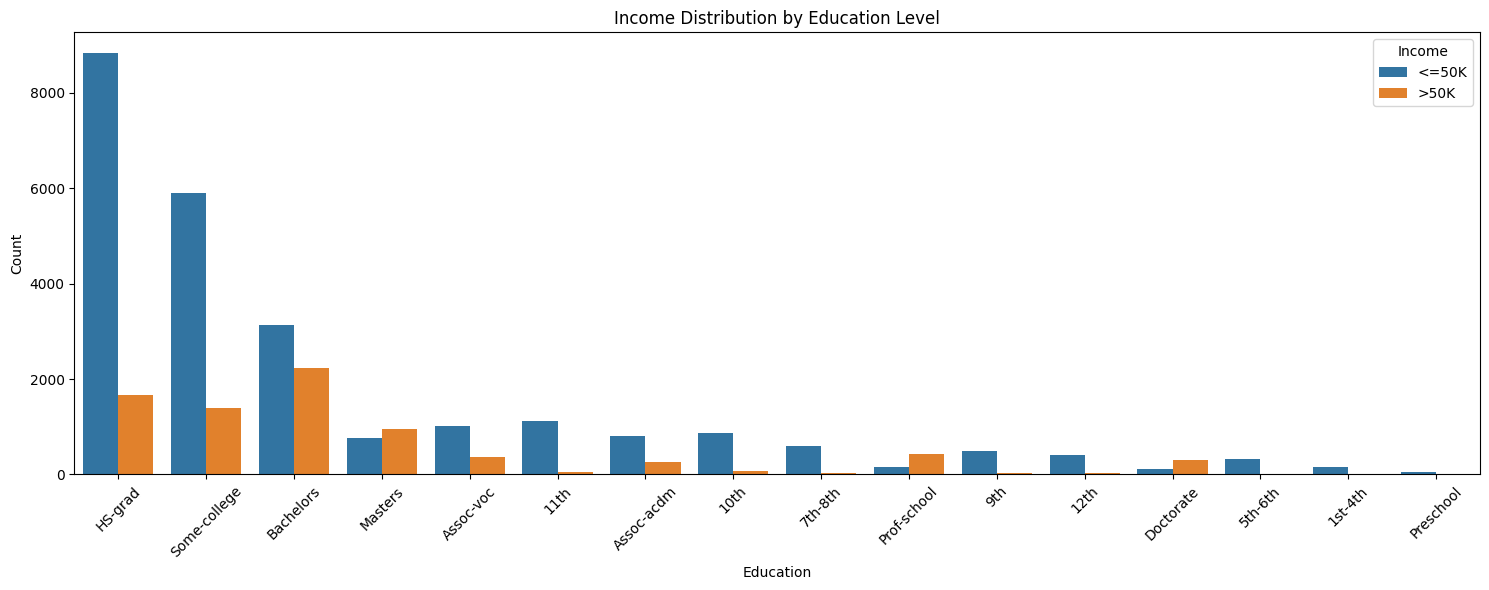

In [67]:
# Plot 1: Income distribution by education
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='education', hue='income', order=df['education'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Income')
plt.tight_layout()
plt.show()

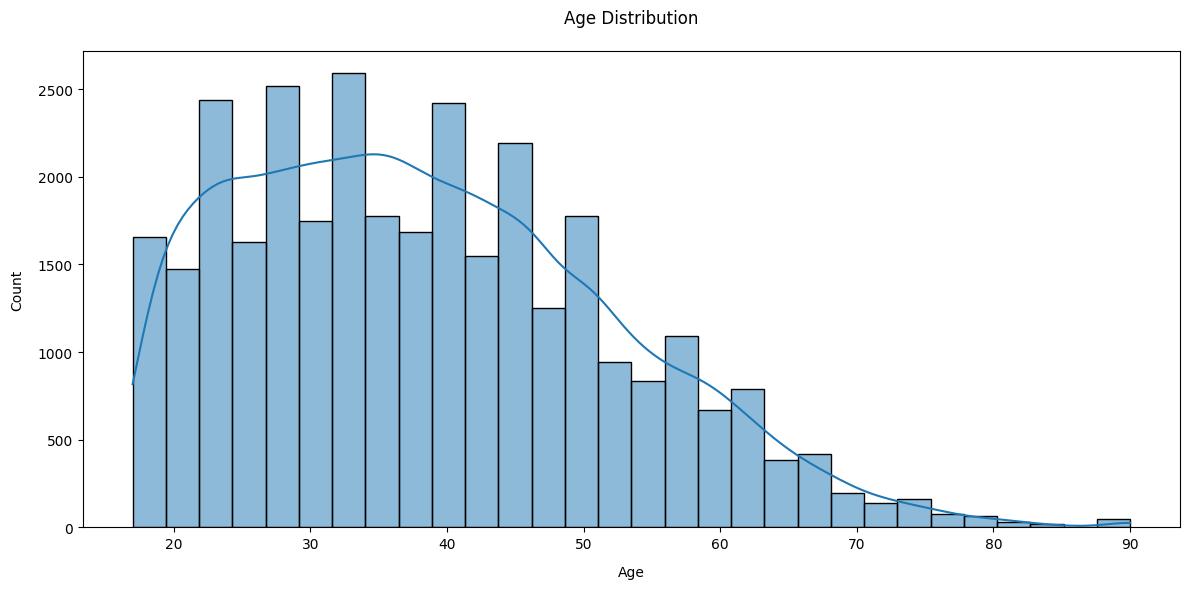

In [68]:
# 2. Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Age Distribution', pad=20)
plt.xlabel('Age', labelpad=10)
plt.ylabel('Count', labelpad=10)
plt.tight_layout()
plt.show()

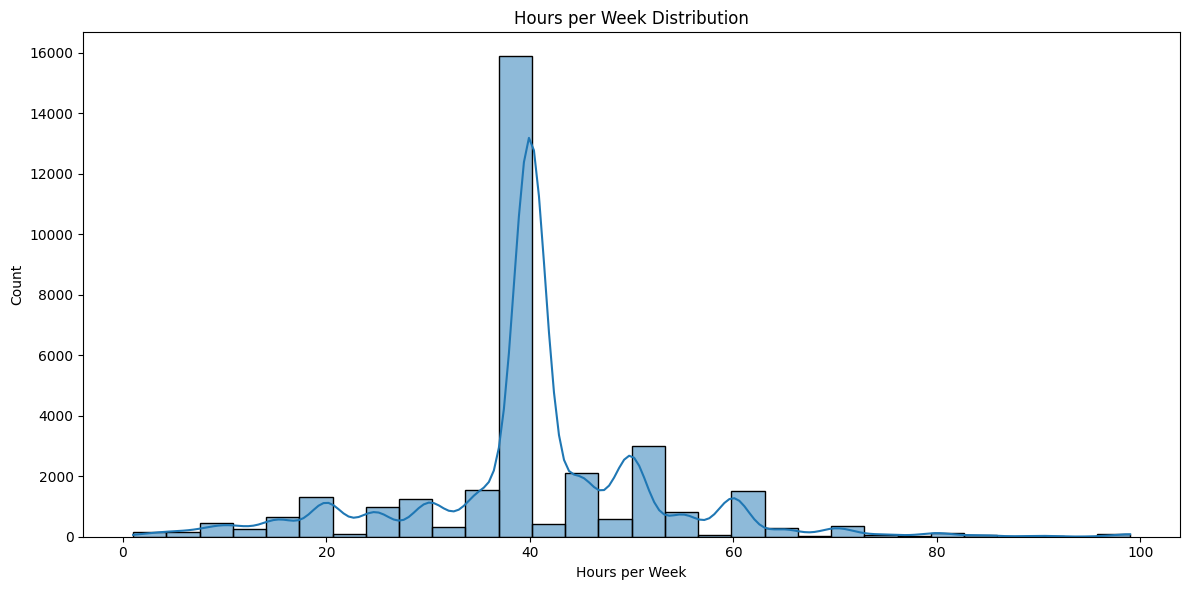

In [69]:
# Plot 3: Hours per week distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='hours.per.week', bins=30, kde=True)
plt.title('Hours per Week Distribution')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

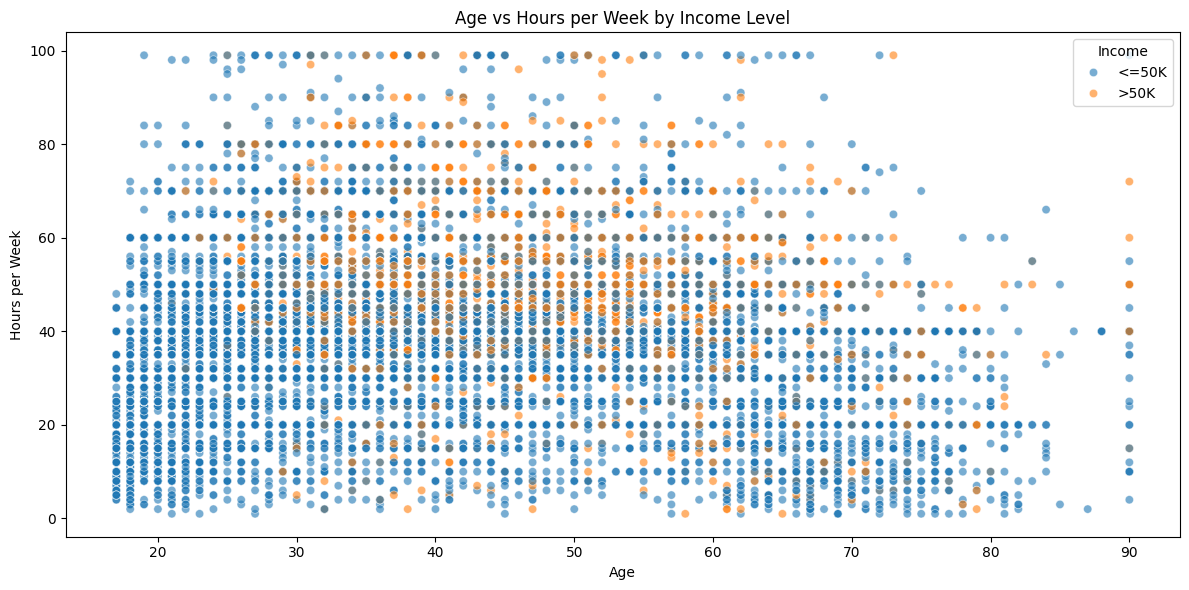

In [70]:
# Plot 4: Age vs Hours per Week by Income
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='age', y='hours.per.week', hue='income', alpha=0.6)
plt.title('Age vs Hours per Week by Income Level')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.legend(title='Income')
plt.tight_layout()
plt.show()

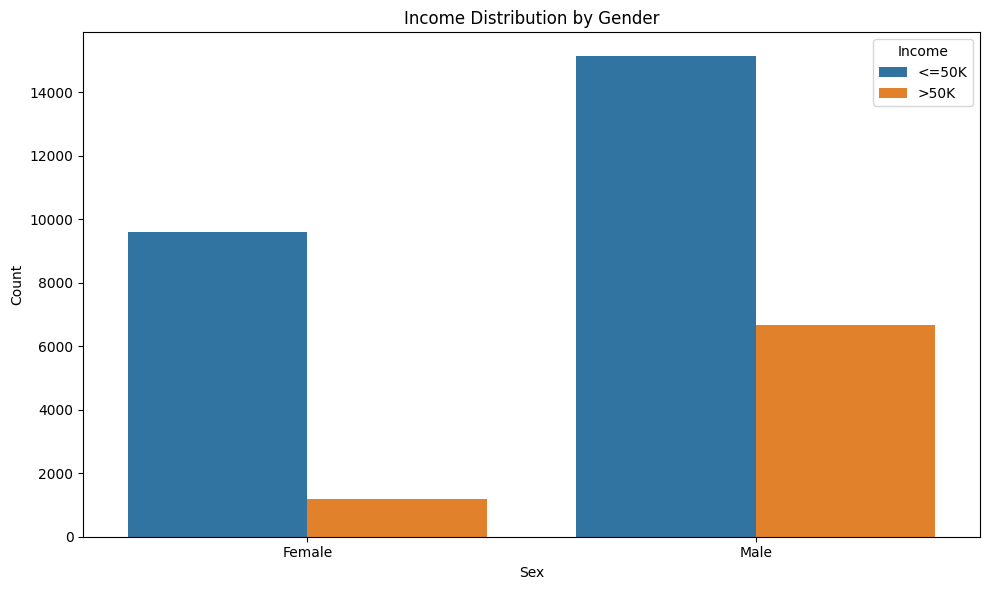

In [71]:
# Plot 5: Income distribution by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sex', hue='income')
plt.title('Income Distribution by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Income')
plt.tight_layout()
plt.show()

In [72]:
X = df.drop("income", axis=1)
y = LabelEncoder().fit_transform(df["income"])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
num_cols = X.select_dtypes(exclude="object").columns
cat_cols = X.select_dtypes(include="object").columns

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)])

In [75]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

X_train_prep.shape

(26048, 108)

## Dimensionality Reduction (PCA)

Reduce dimensionality for faster training and to capture principal components explaining most variance.

In [76]:
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_prep)
X_test_pca = pca.transform(X_test_prep)

X_train_pca.shape

(26048, 32)

## Clustering with KMeans

We apply KMeans clustering on the PCA-reduced training data to explore potential natural groupings in the dataset. The resulting clusters are visualized using the first two principal components.

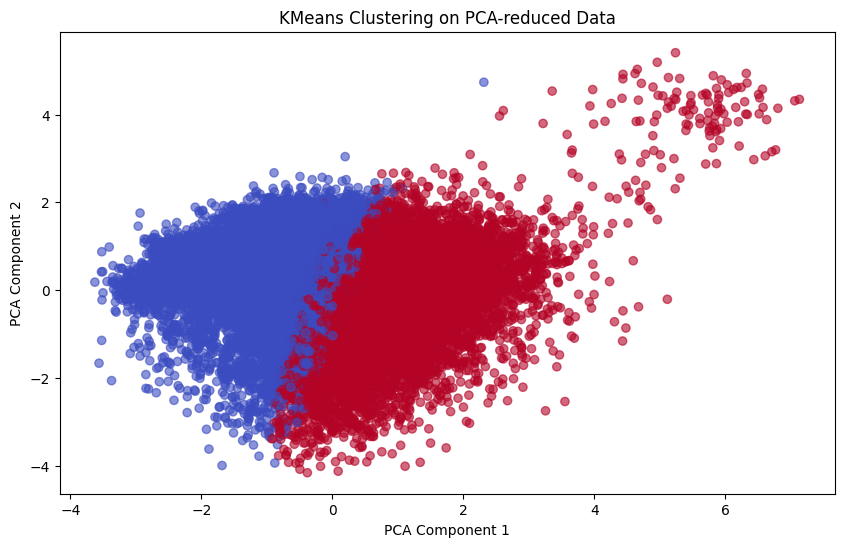

In [77]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_train_pca)

plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='coolwarm', alpha=0.6)
plt.title('KMeans Clustering on PCA-reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Model Building (Random Forest)

Initialize the model; we'll train it on PCA-transformed features.

In [78]:
# Initialize Random Forest classifier with reasonable defaults
rf = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42, n_jobs=-1)

## Model Evaluation

Train the classifier on the training set and evaluate accuracy on the test set. We'll print a simple accuracy score; extend with confusion matrix or classification_report if desired.

In [79]:
rf.fit(X_train_pca, y_train) 
y_pred = rf.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)

print(f"Random Forest accuracy: {acc:.4f}")

Random Forest accuracy: 0.8466
